[ 0.  0.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  1.  1.  1.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  0.  0.
  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.
  1.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.
  1.  1.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.
  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  1.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.
  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  1.  0.  0.  1.  1.  0.
  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.
  0.  1.  0.  0.  1.  1.  0.  1.  1.  0.  0.  1.  0

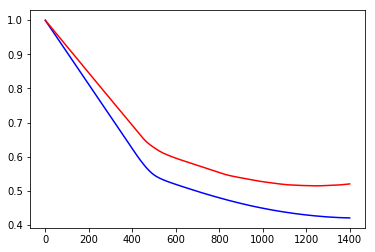

In [18]:
from sklearn.datasets import load_svmlight_file
from numpy import dot
from matplotlib import pyplot as plt

#参数设置
lr=1e-3
iteration=1400
c=1

#读取数据集
def get_data():
    data = load_svmlight_file("australian_scale")
    return data[0], data[1]

#根据设置参数划分训练集以及验证集
def split(x,y,tsize=0.2 ,rstate=33):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=tsize, random_state=rstate)
    return x_train, x_test, y_train, y_test

#计算HingeLoss
def HingeLoss(x,y,w):
    item1 = dot(w.T,w)*0.5
    item2 = 0
    for i in range(x.shape[0]):
        item2 = item2+max(0,1-y[i]*dot(x[i],w))
    return item1+item2

#计算梯度
def gradient(x, y, w, c):
    item1 = w
    item2 = dot(x.T,y)
    item2[item2<0]=0
    return item1-c*item2

x, y = get_data()
x_train, x_test, y_train, y_test = split(x,y,0.1,33)
x_train = x_train.toarray()
x_test = x_test.toarray()
w = np.zeros((14,))
numOfSample=x_train.shape[0]
numOfValidation=x_test.shape[0]
historyTLoss=np.zeros(iteration) #记录每次迭代的训练集loss
historyVLoss=np.zeros(iteration) #记录每次迭代的验证集loss

#主迭代过程
for i in range(iteration):
    grad=gradient(x_train,y_train,w,c)/numOfSample #通过全部样本求梯度
    w=w-lr*grad #往负梯度方向更新权值
    trainingLoss=HingeLoss(x_train, y_train, w)/numOfSample
    validationLoss=HingeLoss(x_test,y_test,w)/numOfValidation
    historyTLoss[i]=trainingLoss
    historyVLoss[i]=validationLoss

#根据阈值为0作预测
predition = dot(x_train, w)
predition[predition<0]=0
predition[predition>0]=1
print(predition)

#根据验证集和训练集Loss绘图
plt.plot(np.arange(iteration),historyTLoss,label='trainloss',color='b')
plt.plot(np.arange(iteration),historyVLoss,label='validationloss',color='r')
plt.show()